In [7]:
import pandas as pd 
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import math

In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
data = pd.read_csv("../data/ageinc_g.csv", index_col = 0)
data.head()

,income,age,gender
0,101743,58,Female
1,49597,27,Female
2,36517,52,Male
3,33223,49,Male
4,72994,53,Female


In [14]:
mmScaler = MinMaxScaler()
mmScaler.fit(data[["income", "age"]]) 
data_mmscaler = mmScaler.transform(data[["income", "age"]])

In [6]:
temp = pd.DataFrame(data_mmscaler, columns = ["mm_income", "mm_age"])
data = pd.concat([data.reset_index(drop = True),
                    temp], axis = 1)

In [11]:
target_cols = ["mm_income", "mm_age"]

In [18]:
# Slecet k
distortions = [] #
K = range(1,8) 
for k in K:
  kmeanmodel = KMeans(n_clusters = k) 
  kmeanmodel.fit(data[target_cols])
  distortions.append(sum(np.min(cdist(data[target_cols],
                                      kmeanmodel.cluster_centers_, "euclidean"), axis = 1)) \
                                      / data[target_cols].shape[0])

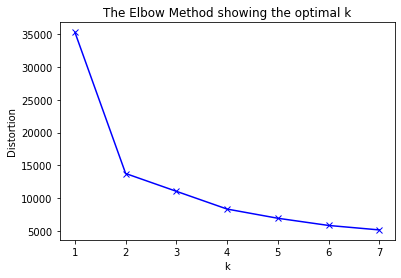

In [19]:
plt.plot(K, distortions, "bx-")
plt.xlabel("k")
plt.ylabel("Distortion")
plt.title("The Elbow Method showing the optimal k")
plt.show()

See this image above, we should choose K is 4. 
But we can use choose automatically, follow the next section

## Finding K in K-means Clustering Automatically

Source [here](https://github.com/bhattbhavesh91/k_means_iris_dataset).

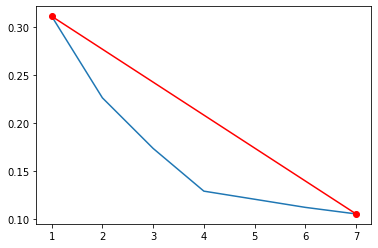

In [23]:
plt.plot(K, distortions)
plt.plot([K[0], K[6]], [distortions[0], 
                        distortions[6]], 'ro-')
plt.show()

a = -0.03438217998264981
b = 0.3461032265677448


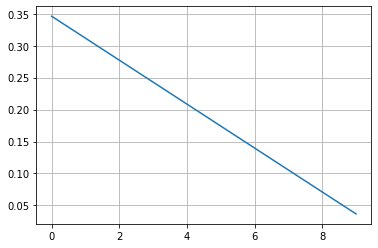

In [24]:
x = [K[0], K[6]]
y = [distortions[0], distortions[6]]

# Calculate the coefficients. This line answers the initial question. 
coefficients = np.polyfit(x, y, 1)

# Print the findings
print ('a =', coefficients[0])
print ('b =', coefficients[1])

# Let's compute the values of the line...
polynomial = np.poly1d(coefficients)
x_axis = np.linspace(0,9,100)
y_axis = polynomial(x_axis)

# ...and plot the points and the line
plt.plot(x_axis, y_axis)
plt.grid('on')
plt.show()

In [25]:
def calc_distance(x1, y1, a, b, c):
  d = abs((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b))
  return d

In [57]:
a = distortions[0] - distortions[-1]
b = K[-1] - K[0]
c1 = K[0] * distortions[-1]
c2 = K[-1] * distortions[0]
c = c1 - c2

In [58]:
distance_of_points_from_line = []
for k in range(len(K)):
  distance_of_points_from_line.append(
      calc_distance(K[k], distortions[k], a, b, c))

In [59]:
distance_of_points_from_line

[0.0,
 0.05096423901096011,
 0.06957661050610925,
 0.08000218064227864,
 0.05431026705655884,
 0.02862802149661117,
 0.0]

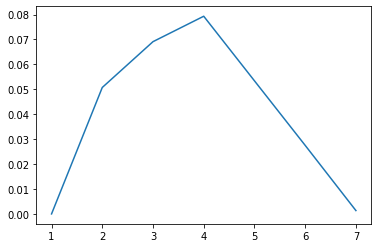

In [55]:
plt.plot(K, distance_of_points_from_line)

In [36]:
optimal_k = K[distance_of_points_from_line.index(max(distance_of_points_from_line))]
print(f"optinal K is {optimal_k}")

optinal K is 4


## After choosing optimal k value

In [37]:
kmeans = KMeans(n_clusters = optimal_k)
kmeans.fit(data[["mm_income", "mm_age"]])

KMeans(n_clusters=4)

In [39]:
centroids = kmeans.cluster_centers_ 
labels = kmeans.labels_ 
normal_centroids = mmScaler.inverse_transform(centroids)

In [41]:
data["Group"] = pd.Series(labels)
data.head()

,income,age,gender,mm_income,mm_age,Group
0,101743,58,Female,0.567465,0.888889,3
1,49597,27,Female,0.276624,0.200000,2
2,36517,52,Male,0.203671,0.755556,1
3,33223,49,Male,0.185299,0.688889,1
4,72994,53,Female,0.407119,0.777778,1


In [42]:
i = 0
for cluster in normal_centroids:
  print ("*** Centroid cluster:" + str(i))
  print ("Income:", round(cluster[0],2))
  print ("Age:", round(cluster[1], 2))
  i += 1

*** Centroid cluster:0
Income: 115210.71
Age: 29.75
*** Centroid cluster:1
Income: 46482.37
Age: 49.34
*** Centroid cluster:2
Income: 43699.21
Age: 29.62
*** Centroid cluster:3
Income: 116199.84
Age: 49.4


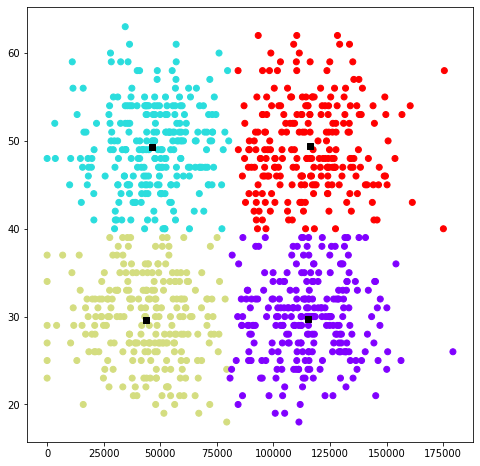

In [43]:
plt.figure(figsize=(8,8))
plt.scatter(data.income, data.age, c = data.Group, cmap = "rainbow")
plt.scatter(normal_centroids[:, 0], normal_centroids[:, 1], marker= "s", c = "black")
plt.show()

## 3-d visualization

In [44]:
from mpl_toolkits import mplot3d

In [47]:
data = pd.get_dummies(data, drop_first = 1)

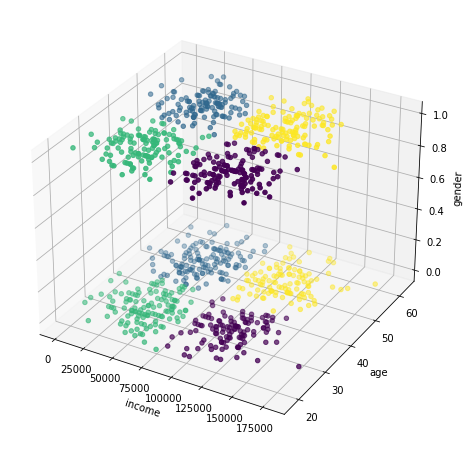

In [48]:
plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')
ax.scatter3D(data.income, data.age, data.gender_Male, c = data.Group)
ax.set_xlabel('income')
ax.set_ylabel('age')
ax.set_zlabel('gender')

plt.show()